<a href="https://colab.research.google.com/github/KrzysztofDrobnik/PUM_Ptojekt_2025/blob/main/Project_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#import potrzebnych bilbiotek
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#wczytanie pliku z danymi
df = pd.read_csv('/content/taxi_trip_pricing (1).csv')

In [4]:
#podstawowe miary statystyczne
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [5]:
#sprawdzenie podstawowych danych o df
wiersze, kolumny = df.shape
print("Liczba wierszy:", wiersze)
print("Liczba kolumn:", kolumny)

df.info()

Liczba wierszy: 1000
Liczba kolumn: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [6]:
#usunięcie dupilkatów danych
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [7]:
#połaczenie zmiennych "Per_Minute_Rate" oraz "Trip_Duration_Minutes" w jedną zmienną będącą ich iloczynem
df["Time_Cost"] = df["Per_Minute_Rate"] * df["Trip_Duration_Minutes"]
df.drop(columns=["Per_Minute_Rate", "Trip_Duration_Minutes"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_Distance_km    950 non-null    float64
 1   Time_of_Day         950 non-null    object 
 2   Day_of_Week         950 non-null    object 
 3   Passenger_Count     950 non-null    float64
 4   Traffic_Conditions  950 non-null    object 
 5   Weather             950 non-null    object 
 6   Base_Fare           950 non-null    float64
 7   Per_Km_Rate         950 non-null    float64
 8   Trip_Price          951 non-null    float64
 9   Time_Cost           902 non-null    float64
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


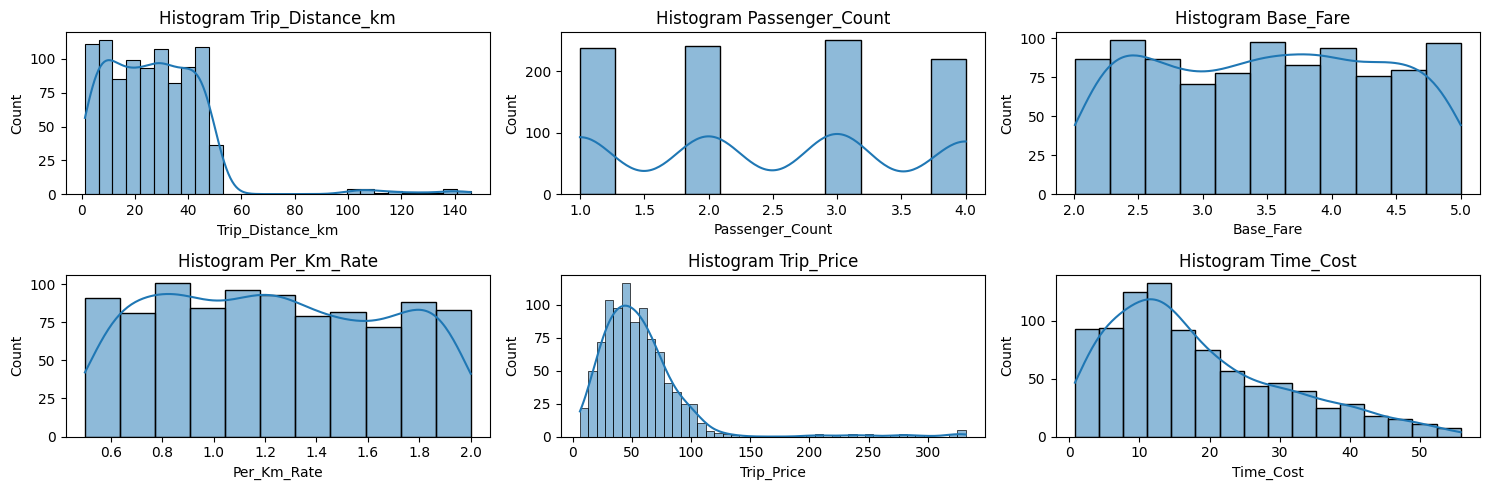

In [13]:
#sprawdzanie rozkładów zmiennych w celu stwierdzenie czy lepiej zastąpić wartości puste średnią czy medianą (lub ewentualnie inną statystyką)
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

sns.histplot(df['Trip_Distance_km'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Histogram Trip_Distance_km')

sns.histplot(df['Passenger_Count'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Histogram Passenger_Count')

sns.histplot(df['Base_Fare'], ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Histogram Base_Fare  ')

sns.histplot(df['Per_Km_Rate'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Histogram Per_Km_Rate')

sns.histplot(df['Trip_Price'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Histogram Trip_Price')

sns.histplot(df['Time_Cost'], ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Histogram Time_Cost')

plt.tight_layout()
plt.show()

In [15]:
#rozkład zmiennej Trip_Distance_km - skośny prawostronnie - najlepiej zastąpić wartości puste medianą
#rozkład zmiennej Passenger_Count - zmienna dyskretna, przyjmowane wartości z kilku możliwych opcji - najlepiej zastąpić wartości puste modą
#rozkład zmiennej Base_Fare - bez silnych skośności - najlepiej zastąpić wartości puste średnią
#rozkład zmiennej Per_Km_Rate - bez silnych skośności - najlepiej zastąpić wartości puste średnią
#rozkład zmiennej Trip_Price - skośny prawostronnie - najlepiej zastąpić wartości puste medianą
#rozkłąd zmiennej Time_Cost - skośnt prawostronnie - najlepiej zastąpić wartości puste medianą

trip_distance_median = df['Trip_Distance_km'].median()
passenger_count_mode = df['Passenger_Count'].mode()[0]
base_fare_mean = df['Base_Fare'].mean()
per_km_rate_mean = df['Per_Km_Rate'].mean()
trip_price_median = df['Trip_Price'].median()
time_cost_median = df['Time_Cost'].median()

df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(trip_distance_median)
df['Passenger_Count'] = df['Passenger_Count'].fillna(passenger_count_mode)
df['Base_Fare'] = df['Base_Fare'].fillna(base_fare_mean)
df['Per_Km_Rate'] = df['Per_Km_Rate'].fillna(per_km_rate_mean)
df['Trip_Price'] = df['Trip_Price'].fillna(trip_price_median)
df['Time_Cost'] = df['Time_Cost'].fillna(time_cost_median)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trip_Distance_km    1000 non-null   float64
 1   Time_of_Day         950 non-null    object 
 2   Day_of_Week         950 non-null    object 
 3   Passenger_Count     1000 non-null   float64
 4   Traffic_Conditions  950 non-null    object 
 5   Weather             950 non-null    object 
 6   Base_Fare           1000 non-null   float64
 7   Per_Km_Rate         1000 non-null   float64
 8   Trip_Price          1000 non-null   float64
 9   Time_Cost           1000 non-null   float64
dtypes: float64(6), object(4)
memory usage: 78.3+ KB


In [24]:
#sprawdzenie wartości dla zmiennych tekstowych
text_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

for column in text_columns:
    print(df[column].value_counts())
    print("\n")

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64


Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64


Traffic_Conditions
Low       397
Medium    371
High      182
Name: count, dtype: int64


Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64




In [27]:
#sprawdzenie jaki procent danych stanowią brakujące dane
braki_procent = df.isnull().sum() / len(df) * 100
braki_procent = braki_procent[braki_procent > 0]
print(braki_procent)


Time_of_Day           5.0
Day_of_Week           5.0
Traffic_Conditions    5.0
Weather               5.0
dtype: float64


Co dalej?
- wartości puste stanowia 5% wszystkich obserwacji - lepiej usunąć wartoścu puste czy np. zastąpić je najczęsciej pojawiającą się wartością (modą)?
- znalezienie i zastapienie wartości odstających - najlepiej metoda IQR
- kodowanie zmiennych kategorycznych na liczbowe - jakie kodowanie najlepiej?
- przeskalowanie danych?
- badanie korelacji i ewentualne usunięcie zmiennych?